In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

data = input_data.read_data_sets("./mnist/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Print shapes of data
print("Training X: ", data.train.images.shape)
print("Training Y: ", data.train.labels.shape)
print("Test X: ", data.test.images.shape)
print("Test Y: ", data.test.labels.shape)

Training X:  (55000, 784)
Training Y:  (55000, 10)
Test X:  (10000, 784)
Test Y:  (10000, 10)


In [0]:
def gaussian_additive_noise(x, std):
    
    return x + tf.random_normal(shape=tf.shape(x), dtype=tf.float32, mean=0.0, stddev=std)

In [0]:
imgs = tf.placeholder(tf.float32, shape=[None, 28*28], name="Input")

noise = gaussian_additive_noise(imgs, 0.1)
corrupted_imgs_test = noise.eval(session=tf.Session(), feed_dict={imgs: data.test.images})

In [0]:
def plot_mnist(imgs, lbls):
    
    classes = np.argmax(lbls, 1)

    for i in range(10):
        ids = (classes == i)
        
        images = imgs[ids][0:10]
            
        for j in range(3):   
            plt.subplot(5, 10, i + j*10 + 1)
            plt.imshow(images[j].reshape(28, 28), cmap='gray')

            if j == 0:
                plt.title(i)
                
            plt.axis('off')
    plt.show()

In [0]:
def autoencoder(dims=[28*28, 512, 256, 128, 64, 32], std=0.01):
    
    x = tf.placeholder(tf.float32, shape=[None, dims[0]], name="Input")

    cur = gaussian_additive_noise(x, 0.1)
    
    Ws = []
    bs = []
    
    # encoder
    for i, n_out in enumerate(dims[1:]):
        n_inp = int(cur.get_shape()[1])
        
        W = tf.Variable(tf.random_normal(shape=[n_inp, n_out], mean=0.0, stddev=std, dtype=tf.float32))
        b = tf.Variable(tf.random_normal(shape=[n_out], mean=0.0, stddev=std, dtype=tf.float32))
        
        Ws.append(W)
        bs.append(b)
        
        out = tf.nn.tanh(cur @ W + b)
        cur = out
        
    z = cur
    Ws.reverse()
    bs.reverse()
    
    # decoder
    for i, n_out in enumerate(dims[:-1][::-1]):
        
        W = tf.transpose(Ws[i])
        b = tf.Variable(tf.random_normal(shape=[n_out], mean=0.0, stddev=std, dtype=tf.float32))
        
        
        out = tf.nn.tanh(cur @ W + b)
        cur = out
    
    y = cur
    
    loss = tf.reduce_mean(tf.square(y - x))
    
    return (x, z, y, loss)

In [7]:
lr = 0.001
batch_size = 64
n_epochs = 50
n_batchs = data.train.num_examples // batch_size

x, z, y, loss = autoencoder(dims=[28*28, 512, 256, 64], std=0.01)
optimizer = tf.train.AdamOptimizer(lr).minimize(loss)


S = tf.Session()
S.run(tf.global_variables_initializer())


for i_epoch in range(1, n_epochs+1):
    loss_avg = 0.0
    for i_batch in range(1, n_batchs+1):
        b, _ = data.train.next_batch(batch_size)
        _, loss_val = S.run([optimizer, loss], feed_dict={x: b})
        loss_avg = (loss_val / batch_size)
    print(i_epoch, loss_avg)
    loss_avg = 0.0

1 0.0005549203488044441
2 0.0005217078141868114
3 0.0004292828089091927
4 0.00033582563628442585
5 0.0002877419756259769
6 0.00029167678439989686
7 0.00025508785620331764
8 0.00022946123499423265
9 0.00023073391639627516
10 0.0001889663253678009
11 0.00019802867609541863
12 0.00017012673197314143
13 0.0001849937398219481
14 0.0001911039580591023
15 0.00017442835087422282
16 0.00019948363478761166
17 0.00018279970390722156
18 0.0001740269217407331
19 0.00016689777839928865
20 0.0001640603441046551
21 0.00017285563808400184
22 0.0001532040478195995
23 0.00016365853662136942
24 0.00016737577971071005
25 0.00016067260003183037
26 0.00016026137745939195
27 0.00016196754586417228
28 0.00017338283942081034
29 0.00018844095757231116
30 0.00018024054588750005
31 0.00017028754518833011
32 0.0001870588312158361
33 0.00014045093848835677
34 0.00016756397963035852
35 0.0001636511442484334
36 0.00015661324141547084
37 0.00015486399934161454
38 0.0001431095734005794
39 0.00016466625675093383
40 0.000

		 Original Images


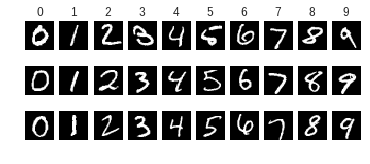

		 Corrupted Images


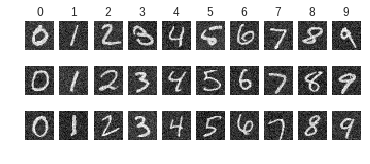

		 Reconstructed Images


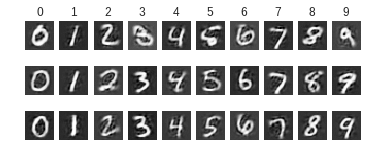

In [8]:
n_samples = 10
reconstructed = S.run([y], feed_dict={x: corrupted_imgs_test})

reconstructed = reconstructed[0]

print("\t\t Original Images")
plot_mnist(data.test.images, data.test.labels)
print("\t\t Corrupted Images")
plot_mnist(corrupted_imgs_test, data.test.labels)
print("\t\t Reconstructed Images")
plot_mnist(reconstructed, data.test.labels)